Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
%matplotlib inline
#Defino una funcion para leer los archivos eliminando las filas vacias
def leer_precios(filename):
    for k in range(5):  #Como se que como maximo 4 filas vacias utilizo range(5)
        df = pd.read_excel(filename,
                           skiprows = k,                #Las filas que voy a omitir
                           usecols = list(range(25)))   #Numero de columnas que voy a tomar
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(25)))
            break
        
    return(df)

filenames = !ls precios/*.xls*

dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))
dfs = pd.concat(dfs)

dfs1 = pd.melt(dfs,id_vars='Fecha')
dfs1.columns = ['Fecha', 'Hora', 'Precio']
dfs1.head(5)

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073
2,1995-07-22,0,1.073
3,1995-07-23,0,1.073
4,1995-07-24,0,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
missed_df = dfs1[dfs1['Precio'].notnull()]
print(dfs1.shape[0] - missed_df.shape[0])

238


**3.--** Compute e imprima el número de registros duplicados.

In [4]:
duplicated_df = dfs1.copy()
duplicated_df = duplicated_df.drop_duplicates()
print(dfs1.shape[0] - duplicated_df.shape[0])

1951


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
dfs1 = dfs1[dfs1['Precio'].notnull()]
dfs1 = dfs1.drop_duplicates()
print(dfs1.shape[0])

199819


**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 0, 'Day')

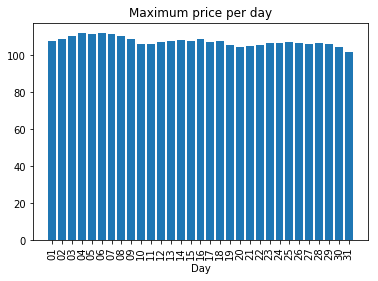

In [35]:
dataDay = dfs1.copy()
dataDay['Fecha'] = pd.to_datetime(dataDay['Fecha'])
dataDay['Dia'] =  dataDay[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%d'), axis=1)
dataDayAverage = dataDay.groupby('Dia').agg({'Precio': np.mean}) 
plt.bar(range(31), dataDayAverage['Precio'])
plt.xticks(range(31), (list(dataDayAverage.index)), rotation='vertical')
plt.title('Maximum price per day')
plt.xlabel('Day')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 0, 'Month')

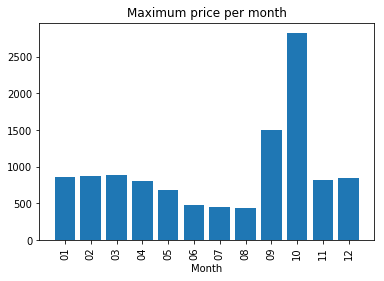

In [36]:
dataMonth = dfs1.copy()
dataMonth['Fecha'] = pd.to_datetime(dataMonth['Fecha'])
dataMonth['Mes'] =  dataMonth[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
dataMonthMax = dataMonth.groupby('Mes').agg({'Precio': np.max}) 
plt.bar(range(12), dataMonthMax['Precio'])
plt.xticks(range(12), (list(dataMonthMax.index)), rotation='vertical')
plt.title('Maximum price per month')
plt.xlabel('Month')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 0, 'Month')

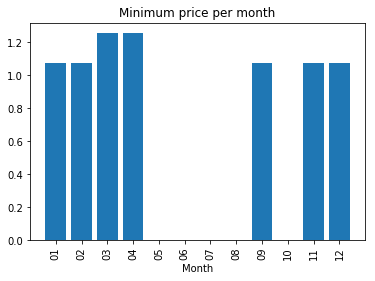

In [37]:
dataMonthMin = dataMonth.groupby('Mes').agg({'Precio': np.min}) 
plt.bar(range(12), dataMonthMin['Precio'])
plt.xticks(range(12), (list(dataMonthMin.index)), rotation='vertical')
plt.title('Minimum price per month')
plt.xlabel('Month')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 0, 'Month')

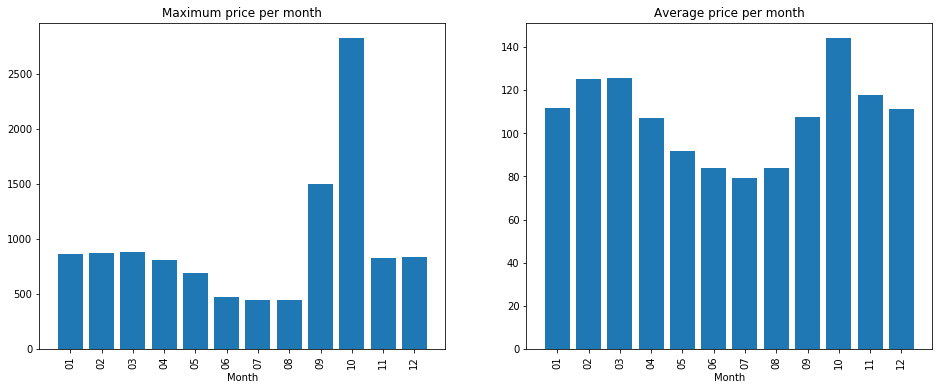

In [38]:
dataMonthMean = dataMonth.groupby('Mes').agg({'Precio': np.mean})
plt.figure(figsize=(16, 6))
plt.subplot(1, 2 , 1)
plt.bar(range(12), dataMonthMax['Precio'])
plt.xticks(range(12), (list(dataMonthMax.index)), rotation='vertical')
plt.title('Maximum price per month')
plt.xlabel('Month')
plt.subplot(1, 2 , 2)
plt.bar(range(12), dataMonthMean['Precio'])
plt.xticks(range(12), (list(dataMonthMean.index)), rotation='vertical')
plt.title('Average price per month')
plt.xlabel('Month')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [42]:
dataDay['Dia'] =  dataDay[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
dataDayWorked = dataDay[(dataDay['Dia'] == 'Monday') | (dataDay['Dia'] == 'Tuesday')| (dataDay['Dia'] == 'Wednesday')| (dataDay['Dia'] == 'Thursday')| (dataDay['Dia'] == 'Friday')]
dataDate = dataDayWorked.groupby('Fecha').agg({'Precio': np.max}) 
dataDate.reset_index(inplace=True)
dataMerge = pd.merge(dataDayWorked, dataDate, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Occurrences')

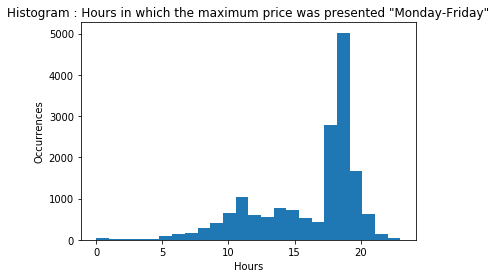

In [44]:
ListaDeHoras = list(map(int,dataMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histogram: Hours in which the maximum price was presented "Monday-Friday"')
plt.xlabel('Hours')
plt.ylabel('Occurrences')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [45]:
dataSaturday = dataDay[(dataDay['Dia'] == 'Saturday') ]
dataDate = dataSaturday.groupby('Fecha').agg({'Precio': np.max}) 
dataDate.reset_index(inplace=True)
dataMerge = pd.merge(dataSaturday, dataDate, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Occurrences')

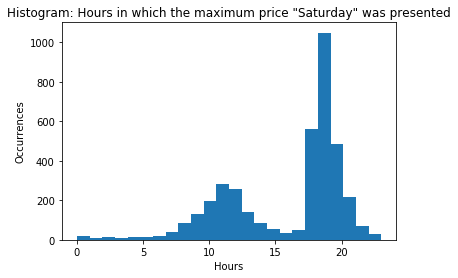

In [47]:
ListaDeHoras = list(map(int,dataMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histogram: Hours in which the maximum price "Saturday" was presented')
plt.xlabel('Hours')
plt.ylabel('Occurrences')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [48]:
dataSunday = dataDay[(dataDay['Dia'] == 'Sunday') ]
dataDate = dataSunday.groupby('Fecha').agg({'Precio': np.max}) 
dataDate.reset_index(inplace=True)
dataMerge = pd.merge(dataSunday, dataDate, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Occurrences')

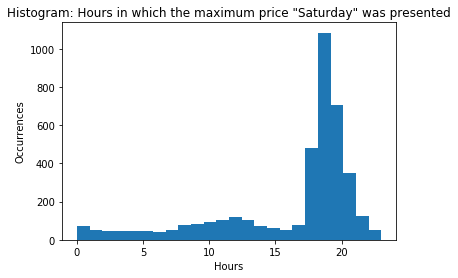

In [49]:
ListaDeHoras = list(map(int,dataMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histogram: Hours in which the maximum price "Saturday" was presented')
plt.xlabel('Hours')
plt.ylabel('Occurrences')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [52]:
dataDay['Year'] =  dataDay[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
dataDate = dataDay.groupby('Year').agg({'Precio': np.min}) 
dataDate.reset_index(inplace=True)
dataDate.columns = ["Year","MinPrecio"]
dataMerge = pd.merge(dataDate, dataDay, on = ['Year'], how ='inner')
dataMerge = dataMerge[(dataMerge['MinPrecio'] == dataMerge['Precio'])]
print(dataMerge[['Fecha','MinPrecio']].drop_duplicates())

            Fecha  MinPrecio
7      1995-07-28   0.000000
10     1995-07-31   0.000000
11     1995-08-01   0.000000
84     1995-10-13   0.000000
338    1995-07-29   0.000000
339    1995-07-30   0.000000
3800   1995-07-26   0.000000
4140   1996-06-30   0.000000
4149   1996-07-09   0.000000
4152   1996-07-12   0.000000
4162   1996-07-22   0.000000
4163   1996-07-23   0.000000
4164   1996-07-24   0.000000
4876   1996-07-04   0.000000
5981   1996-07-11   0.000000
7749   1996-05-10   0.000000
9651   1996-07-21   0.000000
12566  1996-07-08   0.000000
13668  1997-07-15  10.882310
21695  1998-07-12  13.847330
21696  1998-07-13  13.847330
21697  1998-07-14  13.847330
21698  1998-07-15  13.847330
21699  1998-07-16  13.847330
21701  1998-07-18  13.847330
21702  1998-07-19  13.847330
21703  1998-07-20  13.847330
21704  1998-07-21  13.847330
21705  1998-07-22  13.847330
21706  1998-07-23  13.847330
...           ...        ...
32539  1999-03-28  18.359530
37652  1999-03-31  18.359530
41303  2000-03

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

In [60]:
dataMonthMean['Mes'] =  dataMonthMean[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
dataMonthMean['year'] =  dataMonthMean[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
dataMonthYear = dataMonthMean.groupby(['Mes','year']).agg({'Precio': np.mean}) 
dataMonthYear.reset_index(inplace=True)
dataMonthYear.columns = ['Mes','year','PromedioPorMes']

dataMerge = pd.merge(dataMonthYear, dataMonthMean, on = ['Mes','year'], how ='inner')

dataDay = dataDay.groupby('Fecha').agg({'Precio': np.mean}) 
dataDay.reset_index(inplace=True)
dataDay.columns = ['Fecha','PrecioPorDia']

dataMerge = pd.merge(dataMonthYear, dataMonthMean, on = ['Mes','year'], how ='inner')
dataMerge = pd.merge(dataMerge, dataDay, on = ['Fecha'], how ='inner')
dataPlot = dataMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 

<Figure size 2160x2160 with 0 Axes>

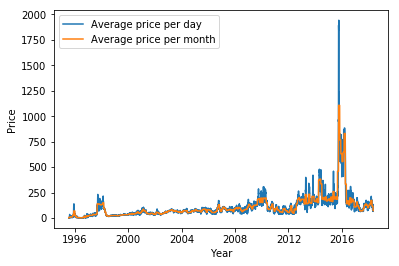

In [63]:
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax.plot((dataPlot.index.tolist()), dataPlot['PrecioPorDia'], label="Average price per day")
ax.plot((dataPlot.index.tolist()), dataPlot['PromedioPorMes'], label="Average price per month")
plt.xlabel("Year")
plt.ylabel("Price")

ax.legend()